In [79]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [80]:
#importing dataframe

ms_df = pd.read_csv('Microsoft_Data.csv')

ms_df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56751,01a3aaeba82aa3de04506d45fe2f8293,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1056.0,0,7.0,0,NaN,53447.0,...,63568.0,1,NaN,0.0,0,0,0.0,1.0,3.0,0
56752,01a3aef1a1af51ef3e4aa0a1c99bf8b6,win8defender,1.1.15100.1,4.18.1807.18075,1.273.689.0,0,7.0,0,NaN,41571.0,...,33211.0,1,0.0,0.0,0,0,0.0,1.0,1.0,1
56753,01a3af52c05b6af7d971d5f3092c3a80,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1454.0,0,7.0,0,NaN,53447.0,...,44032.0,0,NaN,0.0,0,0,0.0,1.0,11.0,0
56754,01a3b0c12114367eb99eaa2fac6b754c,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,43856.0,...,60903.0,0,0.0,0.0,0,0,0.0,0.0,8.0,1


# DataPreprocessing

In [81]:
#missing value dataframe

na_df = pd.DataFrame({'Columns':ms_df.columns,
                     'Missing_val_c':ms_df.isnull().sum(),
                     'Missing_val_p':100*(ms_df.isnull().sum()/ms_df.shape[0])})

na_df.sort_values(by = 'Missing_val_p', ascending = False)

,Columns,Missing_val_c,Missing_val_p
PuaMode,PuaMode,56737,99.966523
Census_ProcessorClass,Census_ProcessorClass,56514,99.573613
DefaultBrowsersIdentifier,DefaultBrowsersIdentifier,53983,95.114173
Census_IsFlightingInternal,Census_IsFlightingInternal,47190,83.145394
Census_InternalBatteryType,Census_InternalBatteryType,40429,71.232997
...,...,...,...
ProductName,ProductName,0,0.000000
Census_HasOpticalDiskDrive,Census_HasOpticalDiskDrive,0,0.000000
Census_PowerPlatformRoleName,Census_PowerPlatformRoleName,0,0.000000
Census_OSVersion,Census_OSVersion,0,0.000000


In [82]:
list(na_df[na_df['Missing_val_p']>0].index)

['RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'IsProtected',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSInstallLanguageIdentifier',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_Thresho

In [83]:
cols_to_drop = list(na_df[na_df['Missing_val_p']>50].index)

for col in ms_df.columns:
    if len(ms_df[col].unique())== 1 or len(ms_df[col].unique())== ms_df.shape[0]:
        cols_to_drop.append(col)
        
        
cols_to_drop

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled',
 'MachineIdentifier',
 'IsBeta',
 'AutoSampleOptIn']

In [84]:
#Dropping Unnecessary columns

ms_df.drop(columns = cols_to_drop, inplace = True)

ms_df.shape

(56756, 73)

In [85]:
#Seperating continuous and categorical columns

con_cols = [col for col in ms_df.columns if ms_df[col].dtype == 'int64' or ms_df[col].dtype == 'float64']

cat_cols = [col for col in ms_df.columns if ms_df[col].dtype == 'object']

In [86]:
#Checking correlation of all input variables with the output variable

y = ms_df['HasDetections']  #Assigning output column to variable Y

from scipy.stats import chi2_contingency, f_oneway

p_values = []

for col in cat_cols:
    contingency_table = pd.crosstab(ms_df[col],y)
    result = chi2_contingency(contingency_table)
    p_values.append(result[1])
    
catcols_pval_df = pd.DataFrame({'Columns': cat_cols,'p_values': p_values})

catcols_pval_df


,Columns,p_values
0,ProductName,6.701547e-01
1,EngineVersion,5.240161e-175
2,AppVersion,2.679675e-100
3,AvSigVersion,6.692324e-30
4,Platform,1.531325e-02
5,Processor,2.159546e-70
6,OsVer,5.191060e-01
7,OsPlatformSubRelease,2.146644e-23
8,OsBuildLab,1.264234e-44
9,SkuEdition,3.911500e-06


In [87]:
uncorr_cols = list(catcols_pval_df[catcols_pval_df['p_values']>0.05]['Columns'])

In [88]:
#Dropping Uncorrelated columns

ms_df.drop(columns = uncorr_cols, inplace = True)

ms_df.drop(columns = 'HasDetections', inplace = True)

In [89]:
ms_df.shape

(56756, 69)

# Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =  train_test_split(ms_df, y, test_size = 0.2, random_state = 30)

In [91]:
#Updating con_cols and cat_cols list

con_cols.remove('HasDetections')

cat_cols.remove('ProductName')

cat_cols.remove('OsVer')

cat_cols.remove('Census_FlightRing')

In [92]:
#Filling Missing Values:


for col in con_cols:
    x_train[col] = x_train[col].fillna(x_train[col].mean())
    x_test[col] = x_test[col].fillna(x_train[col].mean())
    
for col in cat_cols:
    x_train[col] = x_train[col].fillna(x_train[col].mode())
    x_test[col] = x_test[col].fillna(x_train[col].mode())

# Scaling Continuous Variables

In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std_scaler = StandardScaler()

for col in con_cols:
    x_train[col] = std_scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col] = std_scaler.transform(np.array(x_test[col]).reshape(-1,1))

# One Hot Encoding

In [94]:
oe_train_df = pd.get_dummies(x_train)

oe_test_df = pd.get_dummies(x_test)

In [95]:
#Aligning train and test data so that they have similar columns

x_train_oe,x_test_oe = oe_train_df.align(oe_test_df, join='inner', axis = 1, fill_value = 0)

In [96]:
#Adding both continuous and Categorical columns together

x_train_final = pd.concat([x_train_oe,x_train[con_cols]], axis = 1)
x_test_final = pd.concat([x_test_oe, x_test[con_cols]], axis = 1)

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2')

logreg.fit(x_train_final,y_train)

logreg_predictions = logreg.predict(x_test_final)

logreg_predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [98]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,roc_auc_score,roc_curve

confusion_matrix(y_test,logreg_predictions)

array([[3553, 2168],
       [2077, 3554]], dtype=int64)

In [99]:
print('Precision Score:', precision_score(y_test,logreg_predictions))

print('Recall Score:', recall_score(y_test,logreg_predictions))

print('f1 score:', f1_score(y_test,logreg_predictions))

Precision Score: 0.6211114994757078
Recall Score: 0.6311489966258214
f1 score: 0.6260900202589623


In [100]:
logreg.predict_proba(x_test_final)

array([[0.29867144, 0.70132856],
       [0.66377188, 0.33622812],
       [0.44548117, 0.55451883],
       ...,
       [0.32072656, 0.67927344],
       [0.09562084, 0.90437916],
       [0.38629809, 0.61370191]])

In [101]:
roc_auc_score(y_test,logreg_predictions)

0.6260971342157249

Text(0, 0.5, 'True Posotive Rate')

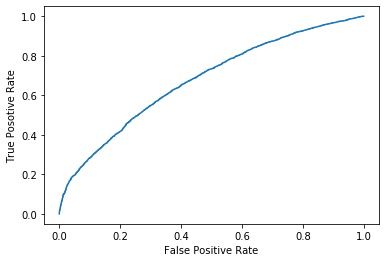

In [102]:
y_probab = logreg.predict_proba(x_test_final)[::,1]

fpr,tpr,tresholds = roc_curve(y_test,y_probab)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Posotive Rate')

# Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=40)

dtc.fit(x_train_final,y_train)

dtc_predictions = dtc.predict(x_test_final)

print('Train Accuracy:', dtc.score(x_train_final,y_train))

print('Test Accuracy:', dtc.score(x_test_final,y_test))

Train Accuracy: 1.0
Test Accuracy: 0.57038407329105


In [104]:
print('Precision Score:', precision_score(y_test,dtc_predictions))

print('Recall Score:', recall_score(y_test,dtc_predictions))

print('f1 score:', f1_score(y_test,dtc_predictions))

Precision Score: 0.5660245183887916
Recall Score: 0.5739655478600604
f1 score: 0.5699673750110219


# Hyperparameter Tuning on DTC

In [105]:
from sklearn.model_selection import GridSearchCV

hyp_dict_dtc = {'max_depth':[9,10,12],
               'min_samples_split': [10,15,20],
               'max_leaf_nodes':[15,22,28],
               'max_features': ['sqrt','log2']}


gcv_dtc = GridSearchCV(estimator=dtc, param_grid=hyp_dict_dtc, cv = 5)

gcv_dtc.fit(x_train_final,y_train)

print(gcv_dtc.best_params_)

print(gcv_dtc.best_score_)

gcv_dtc_predictions = gcv_dtc.predict(x_test_final)


{'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 28, 'min_samples_split': 15}
0.567593023532214


In [106]:
print('Precision Score:', precision_score(y_test,gcv_dtc_predictions))

print('Recall Score:', recall_score(y_test,gcv_dtc_predictions))

print('f1 score:', f1_score(y_test,gcv_dtc_predictions))

Precision Score: 0.5368932038834952
Recall Score: 0.7856508613034985
f1 score: 0.6378775863311945


# Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state= 40)

rfc.fit(x_train_final,y_train)

rfc_predictions = rfc.predict(x_test_final)

print('Train Accuracy:', rfc.score(x_train_final,y_train))

print('Test Accuracy:', rfc.score(x_test_final,y_test))

Train Accuracy: 1.0
Test Accuracy: 0.6211240310077519


In [108]:
print('Precision Score:', precision_score(y_test,rfc_predictions))

print('Recall Score:', recall_score(y_test,rfc_predictions))

print('f1 score:', f1_score(y_test,rfc_predictions))

Precision Score: 0.6175326970661011
Recall Score: 0.6204936956135677
f1 score: 0.6190096554167774


# Hyperparameter Tuning on RFC

In [109]:
hyp_dict_rfc = {'n_estimators':[125,200],
                'max_depth':[8,9,11],
               'min_samples_split':[11,12,13],
               'max_leaf_nodes':[30,32,14],
               'max_features': ['sqrt','log2']}


gcv_rfc = GridSearchCV(estimator=rfc, param_grid= hyp_dict_rfc, cv = 5)

gcv_rfc.fit(x_train_final,y_train)

print(gcv_rfc.best_params_)

print(gcv_rfc.best_score_)

gcv_rfc_predictions = gcv_rfc.predict(x_test_final)



{'max_depth': 11, 'max_features': 'sqrt', 'max_leaf_nodes': 32, 'min_samples_split': 11, 'n_estimators': 125}
0.6198793142675296


In [110]:
print('Precision Score:', precision_score(y_test,gcv_rfc_predictions))

print('Recall Score:', recall_score(y_test,gcv_rfc_predictions))

print('f1 score:', f1_score(y_test,gcv_rfc_predictions))

Precision Score: 0.6024952621604548
Recall Score: 0.6774995560291245
f1 score: 0.6377998829724986


# Adaboost Classifier

In [112]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()

adb.fit(x_train_final,y_train)

adb_predictions = adb.predict(x_test_final)

print('Train Accuracy:', adb.score(x_train_final,y_train))

print('Test Accuracy:', adb.score(x_test_final, y_test))

Train Accuracy: 0.6333142454409303
Test Accuracy: 0.6291402396053559


In [113]:
print('Precision Score:', precision_score(y_test,adb_predictions))

print('Recall Score:', recall_score(y_test,adb_predictions))

print('f1 score:', f1_score(y_test,adb_predictions))

Precision Score: 0.6204441430750974
Recall Score: 0.6499733617474693
f1 score: 0.634865568083261


# Hyperparameter Tuning on Adaboost

In [114]:
hyp_dict_adb = {'n_estimators': [125,150],
               'learning_rate': [0.5,1]}


gcv_adb = GridSearchCV(estimator=adb, param_grid=hyp_dict_adb, cv= 10)

gcv_adb.fit(x_train_final, y_train)

gcv_adb_predictions = gcv_adb.predict(x_test_final)

print( gcv_adb.best_params_)

print(gcv_adb.best_score_)

{'learning_rate': 0.5, 'n_estimators': 150}
0.6321027117588452


In [115]:
print('Precision Score:', precision_score(y_test,gcv_adb_predictions))

print('Recall Score:', recall_score(y_test,gcv_adb_predictions))

print('f1 score:', f1_score(y_test,gcv_adb_predictions))

Precision Score: 0.6195926611681535
Recall Score: 0.6537027171017581
f1 score: 0.6361908053923263


# Gradient Boost Classifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state= 50)

gbc.fit(x_train_final,y_train)

gbc_predictions = gbc.predict(x_test_final)

print('Train Accuracy:', gbc.score(x_train_final,y_train))

print('Test Accuracy:', gbc.score(x_test_final, y_test))


Train Accuracy: 0.641397233723901
Test Accuracy: 0.6284355179704016


In [117]:
print('Precision Score:', precision_score(y_test, gbc_predictions))

print('Recall:', recall_score(y_test,gbc_predictions))

print('F1 Score:', f1_score(y_test,gbc_predictions))

Precision Score: 0.6214961306964746
Recall: 0.6418042976380749
F1 Score: 0.6314869823519134


# HyperParameter Tuning on GBC Classifier

In [122]:
hyp_dict_gbc = {'n_estimators': [150,200],
                'max_depth':[4,5,6],
               'min_samples_split': [18,20,26],
               'max_leaf_nodes':[10,12,14],
               'max_features': ['sqrt','log2']}

gcv_gbc = GridSearchCV(estimator=gbc, param_grid=hyp_dict_gbc, cv= 5)

gcv_gbc.fit(x_train_final,y_train)

gcv_gbc_predictions = gcv_gbc.predict(x_test_final)

print(gcv_gbc.best_params_)

print(gcv_gbc.best_score_)

gcv_gbc.score(x_test_final,y_test)

{'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 14, 'min_samples_split': 18, 'n_estimators': 200}
0.6348779996187034


0.6283474277660324

In [123]:
print('Precision Score:', precision_score(y_test, gcv_gbc_predictions))

print('Recall:', recall_score(y_test,gcv_gbc_predictions))

print('F1 Score:', f1_score(y_test,gcv_gbc_predictions))

Precision Score: 0.6209732693625771
Recall: 0.6435801811401172
F1 Score: 0.6320746489927618


# Support Vector Machine Classifier

In [126]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train_final,y_train)

svc_preditions = svc.predict(x_test_final)

print('Train Accuracy:', svc.score(x_train_final,y_train))

print('Test Accuracy:', svc.score(x_test_final,y_test))

Train Accuracy: 0.7040128623028808
Test Accuracy: 0.6239429175475687


In [128]:
print('Precision Score:', precision_score(y_test, svc_preditions))

print('Recall:', recall_score(y_test,svc_preditions))

print('F1 Score:', f1_score(y_test,svc_preditions))

Precision Score: 0.6208303761533002
Recall: 0.6213816373645888
F1 Score: 0.6211058844412888
